# STROKE PREDICTION

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,PolynomialFeatures

from sklearn.cluster import KMeans


import joblib

In [2]:
data = pd.read_csv('dataset.txt')

In [3]:
data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  3
smoking_status       0
stroke               0
dtype: int64

In [5]:
data['bmi'] = data.groupby(['gender','age','work_type'])['bmi'].transform(lambda x: x.mean())

In [6]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  3
smoking_status       0
stroke               0
dtype: int64

# Preprocessing and PipeLine

In [4]:
num_cols = data.drop(columns = ['id']).select_dtypes(np.number).columns
cat_cols = data.drop(columns = ['id']).select_dtypes(object).columns

In [10]:
class columntransformer_num(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X['bmi'] = X.groupby(['age','gender','work_type'])['bmi'].transform(lambda x: x.fillna(x.mean()))
        a = X[['bmi']]
        return a

In [11]:
numerical_custom_transformer = Pipeline([
    ('numerical custom',columntransformer_num())
])

In [12]:
First_column_transformer = ColumnTransformer([
    ('numerical custom',numerical_custom_transformer,['age','gender','work_type','bmi'])
])

In [13]:
numerical_preprocessing = Pipeline([
    ('numerical imputer',SimpleImputer(strategy='mean')),
    ('numerical scaling',MinMaxScaler())
])

In [45]:
categorical_preprocessing = Pipeline([
    ('categorical imputer',SimpleImputer(strategy='most_frequent')),
    ('categorical encoding',OneHotEncoder(sparse=False,handle_unknown='ignore'))
])

In [14]:
Second_column_transformer = ColumnTransformer(
    transformers = [
        ('numerical preprocessing',numerical_preprocessing,num_cols)
        #('categorical preprocessing',categorical_preprocessing,cat_cols)
    
])

In [15]:
Final_preprocessing = Pipeline([
    ('First column Transformer',First_column_transformer),
    ('Second column Transformer',Second_column_transformer)
])

In [16]:
Package = Pipeline([
    ('preprocessing',Final_preprocessing)
])

In [17]:
Package.fit(data)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

# Model Building and Pickling

In [48]:
Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('polynomial',PolynomialFeatures(degree=2)),
    ('model',KMeans(n_clusters = 2, random_state = 20))
])

In [49]:
Package

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('First column Transformer',
                                  ColumnTransformer(transformers=[('numerical '
                                                                   'custom',
                                                                   Pipeline(steps=[('numerical '
                                                                                    'custom',
                                                                                    columntransformer_num())]),
                                                                   ['age',
                                                                    'gender',
                                                                    'work_type',
                                                                    'bmi'])])),
                                 ('Second column Transformer',
                                  ColumnTransformer(transformers=[('numerical '
                                                                   'preprocessing',
                                                                   Pipeline(steps=[('numerical '
                                                                                    'imp...
                                                                   'preprocessing',
                                                                   Pipeline(steps=[('categorical '
                                                                                    'imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('categorical '
                                                                                    'encoding',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))]))])),
                ('polynomial', PolynomialFeatures()),
                ('model', KMeans(n_clusters=2, random_state=20))])

In [50]:
Package.fit(data)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

# Model Fitting & Predicting

In [99]:
Package.fit(train_x,train_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical preprocessing',
                                                  Pipeline(steps=[('numerical '
                                                                   'custom',
                                                                   Pipeline(steps=[('numerical '
                                                                                    'custom',
                                                                                    columntransformer_num())])),
                                                                  ('numerical '
                                                                   'in-built',
                                                                   Pipeline(steps=[('numerical '
                                                                                    'imputer',
                                                                                    SimpleImputer()),
                                                                                   ('numerical '
                                                                                    'scaling',
                                                                                    MinMaxScaler())]))]),
                                                  Index(['age', 'hypertension', 'heart_d...
                                                 ('categorical preprocessing',
                                                  Pipeline(steps=[('categorical '
                                                                   'imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('categorical '
                                                                   'encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))])),
                ('polynomial', PolynomialFeatures()),
                ('model', RandomForestClassifier())])

# Finding Best K-Value :

In [33]:
res = []
for i in range(1,10):
    Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('Polynomial',PolynomialFeatures(degree=2)),
    ('model',KMeans(n_clusters=i))
 ])   
    Package.fit(data)
    res.append(model.inertia_)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

<Axes: >

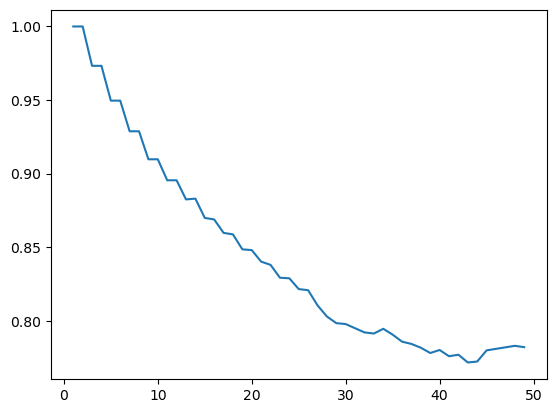

In [70]:
pd.Series(res,range(1,50)).plot()